# Convolutional Neural Network Architecture

1.  We have taken 2 convolutional layers.

2. The first convolutional neural network has 200 kernels(filter) of 3 y 3 matrics and Each kernel has its own set of numerical values, which are learned by the network during training, and is used to extract a particular feature or pattern from the input image. 

3. While the second has 100 kernels of 3 by 3 materics 
4. the we have flatten the covolutions and we will cnnect it to a dense layer of 50 neurons and the last layer will be the ouput layer. 
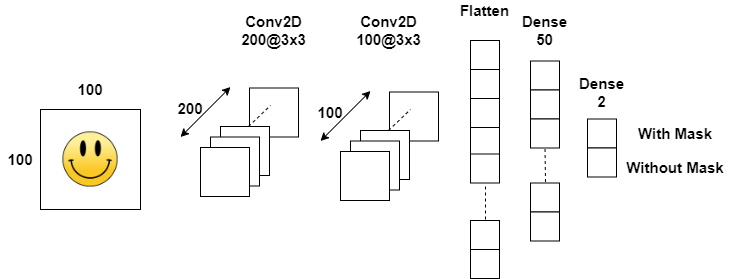

In [4]:
import numpy as np


data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [7]:
#importing the required libraries
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()
# A sequential model is a linear stack of layers,where you can add one layer at a time, and each layer is connected to the previous layer.

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # from a matrics of 2 by 2, we will choose the max, for reducing the dimensions
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5)) #50% of the data will be ignored at random during training, to avoid overfiting.
#Flatten layer to stack the output convolutions from second convolution layer

model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
# splitting the model into training and testing dataset.  
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)


model-{epoch:03d}.model: This specifies the file name for the saved model, where {epoch:03d} is a placeholder for the epoch number, padded with zeros to a length of three digits. So, for example, if the model is saved after the first epoch, the file name will be model-001.model

In [9]:
# we are saving the model but monitering the validational loss , thus saving the best model per each epoch

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

# training the model 
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2) # checkpoint will be executed after each epoch

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.5899

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


31/31 [==============================] - 49s 2s/step - loss: 0.6735 - accuracy: 0.5899 - val_loss: 0.5626 - val_accuracy: 0.7097
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.5099 - accuracy: 0.7535

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


31/31 [==============================] - 49s 2s/step - loss: 0.5099 - accuracy: 0.7535 - val_loss: 0.4186 - val_accuracy: 0.8065
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.3230 - accuracy: 0.8778

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


31/31 [==============================] - 44s 1s/step - loss: 0.3230 - accuracy: 0.8778 - val_loss: 0.3258 - val_accuracy: 0.8831
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.2236 - accuracy: 0.9152

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


31/31 [==============================] - 46s 1s/step - loss: 0.2236 - accuracy: 0.9152 - val_loss: 0.2043 - val_accuracy: 0.9194
Epoch 5/20
31/31 [==============================] - ETA: 0s - loss: 0.1518 - accuracy: 0.9475

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


31/31 [==============================] - 43s 1s/step - loss: 0.1518 - accuracy: 0.9475 - val_loss: 0.2000 - val_accuracy: 0.9315
Epoch 6/20
31/31 [==============================] - ETA: 0s - loss: 0.1206 - accuracy: 0.9545

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


31/31 [==============================] - 41s 1s/step - loss: 0.1206 - accuracy: 0.9545 - val_loss: 0.1741 - val_accuracy: 0.9476
Epoch 7/20
31/31 [==============================] - 44s 1s/step - loss: 0.1369 - accuracy: 0.9465 - val_loss: 0.1773 - val_accuracy: 0.9395
Epoch 8/20
31/31 [==============================] - ETA: 0s - loss: 0.0969 - accuracy: 0.9606

INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


31/31 [==============================] - 52s 2s/step - loss: 0.0969 - accuracy: 0.9606 - val_loss: 0.1556 - val_accuracy: 0.9476
Epoch 9/20
31/31 [==============================] - 54s 2s/step - loss: 0.0809 - accuracy: 0.9737 - val_loss: 0.2558 - val_accuracy: 0.9153
Epoch 10/20
31/31 [==============================] - 56s 2s/step - loss: 0.0711 - accuracy: 0.9717 - val_loss: 0.2047 - val_accuracy: 0.9435
Epoch 11/20
31/31 [==============================] - 39s 1s/step - loss: 0.0372 - accuracy: 0.9879 - val_loss: 0.1922 - val_accuracy: 0.9355
Epoch 12/20
31/31 [==============================] - 39s 1s/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.1897 - val_accuracy: 0.9516
Epoch 13/20
31/31 [==============================] - 39s 1s/step - loss: 0.0723 - accuracy: 0.9687 - val_loss: 0.1886 - val_accuracy: 0.9315
Epoch 14/20
31/31 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9808

INFO:tensorflow:Assets written to: model-014.model\assets


INFO:tensorflow:Assets written to: model-014.model\assets


31/31 [==============================] - 41s 1s/step - loss: 0.0421 - accuracy: 0.9808 - val_loss: 0.1365 - val_accuracy: 0.9637
Epoch 15/20
31/31 [==============================] - ETA: 0s - loss: 0.0495 - accuracy: 0.9818

INFO:tensorflow:Assets written to: model-015.model\assets


INFO:tensorflow:Assets written to: model-015.model\assets


31/31 [==============================] - 40s 1s/step - loss: 0.0495 - accuracy: 0.9818 - val_loss: 0.1258 - val_accuracy: 0.9677
Epoch 16/20
31/31 [==============================] - ETA: 0s - loss: 0.0322 - accuracy: 0.9919

INFO:tensorflow:Assets written to: model-016.model\assets


INFO:tensorflow:Assets written to: model-016.model\assets


31/31 [==============================] - 40s 1s/step - loss: 0.0322 - accuracy: 0.9919 - val_loss: 0.1188 - val_accuracy: 0.9718
Epoch 17/20
31/31 [==============================] - 38s 1s/step - loss: 0.0325 - accuracy: 0.9909 - val_loss: 0.1505 - val_accuracy: 0.9476
Epoch 18/20
31/31 [==============================] - 50s 2s/step - loss: 0.0215 - accuracy: 0.9939 - val_loss: 0.1830 - val_accuracy: 0.9395
Epoch 19/20
31/31 [==============================] - 48s 2s/step - loss: 0.0507 - accuracy: 0.9838 - val_loss: 0.1740 - val_accuracy: 0.9435
Epoch 20/20
31/31 [==============================] - 39s 1s/step - loss: 0.0384 - accuracy: 0.9869 - val_loss: 0.1939 - val_accuracy: 0.9516


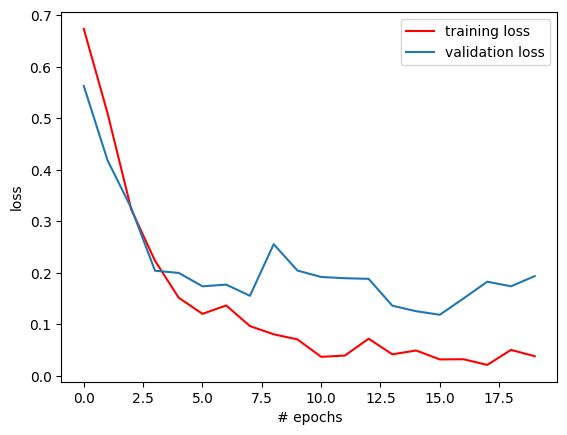

In [17]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

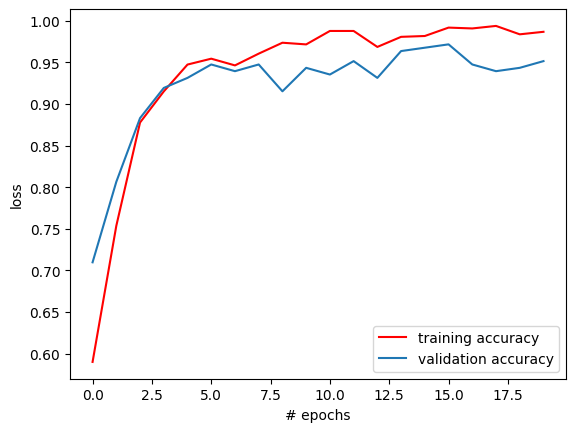

In [18]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 252ms/step - loss: 0.1569 - accuracy: 0.9565
[0.15689212083816528, 0.95652174949646]
